# Analysis of Humanitarian Funding Evolution from 2010 to 2024

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import data

file_path = '../../Data/2010-2024 Humanitarian Needs and Funding.xlsx'
df = pd.read_excel(file_path, sheet_name='Raw Data')


In [17]:
# View basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1259 non-null   int64  
 1   Plan                   1259 non-null   object 
 2   Crisis Country         1259 non-null   object 
 3   Country Code           1236 non-null   object 
 4   Metric                 1259 non-null   object 
 5   Value                  1259 non-null   float64
 6   Standardised Plan      1259 non-null   object 
 7   Appeal Type            974 non-null    object 
 8   PiN Value for Dataviz  47 non-null     object 
 9   OUSG Metric            619 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 98.5+ KB


In [18]:
# Display summary statistics for numeric columns
df.describe()


,Year,Value
count,1259.000000,1.259000e+03
mean,2017.396346,4.000020e+08
std,3.972203,8.099401e+08
min,2010.000000,0.000000e+00
25%,2014.000000,5.751249e+06
50%,2017.000000,7.450000e+07
75%,2021.000000,4.324000e+08
max,2024.000000,6.080900e+09


In [19]:
# View the number of unique values in each column
df.nunique()


Year                       15
Plan                      158
Crisis Country             76
Country Code               66
Metric                      4
Value                    1065
Standardised Plan         162
Appeal Type                20
PiN Value for Dataviz       1
OUSG Metric                 3
dtype: int64

In [20]:
# Check for missing (null) values in the dataset
df.isnull().sum()


Year                        0
Plan                        0
Crisis Country              0
Country Code               23
Metric                      0
Value                       0
Standardised Plan           0
Appeal Type               285
PiN Value for Dataviz    1212
OUSG Metric               640
dtype: int64

In [21]:
# Check if there are any duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 7


In [ ]:
# Count how many times each metric appears
df['Metric'].value_counts()


Metric
Funding requirements    497
People in need          402
Funding received        306
People targeted          54
Name: count, dtype: int64

In [23]:
# Display the first 5 rows
df.head()


,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,7800000.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,223824925.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,448551322.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,5400000.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,345246607.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


In [46]:
# Filter only the metrics we need for analysis
metrics_needed = df[df['Metric'].isin(['People in need', 'People targeted', 'Funding requirements', 'Funding received'])]

# Pivot the data to make each metric a column
metrics_summary = metrics_needed.pivot_table(
    index=['Year', 'Plan', 'Crisis Country', 'Country Code'],
    columns='Metric',
    values='Value',
    aggfunc='sum'
).reset_index()

metrics_summary.head()

Metric,Year,Plan,Crisis Country,Country Code,Funding received,Funding requirements,People in need,People targeted
0,2010,Afghanistan,Afghanistan,AFG,2.919600e+09,6.249234e+09,58650000.0,22000000.0
1,2010,Afghanistan Flash Appeal,Afghanistan,AFG,5.350000e+07,1.521000e+08,NaN,NaN
2,2010,Afghanistan Humanitarian Action Plan,Afghanistan,AFG,5.052999e+08,7.745083e+08,NaN,NaN
3,2010,Bangladesh,Bangladesh,BGD,1.445100e+09,2.305400e+09,2500000.0,NaN
4,2010,Burkina Faso,Burkina Faso,BFA,1.619487e+08,1.260622e+08,NaN,3500000.0


In [57]:
# Rename metric columns to consistent format
metrics_summary.columns.name = None
metrics_summary = metrics_summary.rename(columns={
    'Funding received': 'Funding Received',
    'Funding requirements': 'Funding Requirements',
    'People in need': 'People in Need',
    'People targeted': 'People Targeted'
})

# Add funding gap and coverage columns
metrics_summary['Funding Gap'] = metrics_summary['Funding Requirements'] - metrics_summary['Funding Received']
metrics_summary['Funding Coverage (%)'] = (
    metrics_summary['Funding Received'] / metrics_summary['Funding Requirements']
) * 100

metrics_summary.head()

,Year,Plan,Crisis Country,Country Code,Funding Received,Funding Requirements,People in Need,People Targeted,Funding Gap,Funding Coverage (%)
0,2010,Afghanistan,Afghanistan,AFG,2.919600e+09,6.249234e+09,58650000.0,22000000.0,3.329634e+09,46.719322
1,2010,Afghanistan Flash Appeal,Afghanistan,AFG,5.350000e+07,1.521000e+08,NaN,NaN,9.860000e+07,35.174227
2,2010,Afghanistan Humanitarian Action Plan,Afghanistan,AFG,5.052999e+08,7.745083e+08,NaN,NaN,2.692084e+08,65.241379
3,2010,Bangladesh,Bangladesh,BGD,1.445100e+09,2.305400e+09,2500000.0,NaN,8.603000e+08,62.683265
4,2010,Burkina Faso,Burkina Faso,BFA,1.619487e+08,1.260622e+08,NaN,3500000.0,-3.588653e+07,128.467331


In [110]:
# Group by Year and Country to get totals per country per year
country_year_summary = metrics_summary.groupby(['Year', 'Crisis Country'])[
    ['Funding Received', 'Funding Requirements', 'Funding Gap']
].sum().reset_index()

# Recalculate the Funding Gap after aggregation
country_year_summary['Funding Gap'] = (
    country_year_summary['Funding Requirements'] - country_year_summary['Funding Received']
)

# Calculate funding coverage percentage per country per year
country_year_summary['Funding Coverage (%)'] = (
    country_year_summary['Funding Received'] / country_year_summary['Funding Requirements']
) * 100


country_year_summary.head(10)

,Year,Crisis Country,Funding Received,Funding Requirements,Funding Gap,Funding Coverage (%)
0,2010,Afghanistan,3.478400e+09,7.175842e+09,3.697443e+09,48.473747
1,2010,Bangladesh,1.445100e+09,2.305400e+09,8.603000e+08,62.683265
2,2010,Burkina Faso,1.619487e+08,1.260622e+08,-3.588653e+07,128.467331
3,2011,Bangladesh,0.000000e+00,8.710000e+08,8.710000e+08,0.000000
4,2011,Benin,0.000000e+00,0.000000e+00,0.000000e+00,NaN
5,2011,Burkina Faso,2.800966e+08,1.075140e+09,7.950439e+08,26.052090
6,2011,Burundi,6.359000e+08,2.086800e+09,1.450900e+09,30.472494
7,2011,Cameroon,5.280000e+08,8.601000e+08,3.321000e+08,61.388211
8,2012,Burkina Faso,0.000000e+00,6.074000e+08,6.074000e+08,0.000000
9,2012,Burundi,8.540000e+07,1.040000e+08,1.860000e+07,82.115385


In [111]:
# Create yearly global summary
yearly_summary = country_year_summary.groupby('Year')[
    ['Funding Received', 'Funding Requirements', 'Funding Gap']
].sum().reset_index()

# Add global funding coverage
yearly_summary['Funding Coverage (%)'] = (
    yearly_summary['Funding Received'] / yearly_summary['Funding Requirements']
) * 100

yearly_summary.head()

,Year,Funding Received,Funding Requirements,Funding Gap,Funding Coverage (%)
0,2010,5.085448e+09,9.607304e+09,4.521856e+09,52.933144
1,2011,1.443997e+09,4.893040e+09,3.449044e+09,29.511233
2,2012,4.424168e+09,1.126303e+10,6.838860e+09,39.280448
3,2013,4.712464e+09,1.034853e+10,5.636066e+09,45.537517
4,2014,3.878980e+09,9.923709e+09,6.044728e+09,39.088011


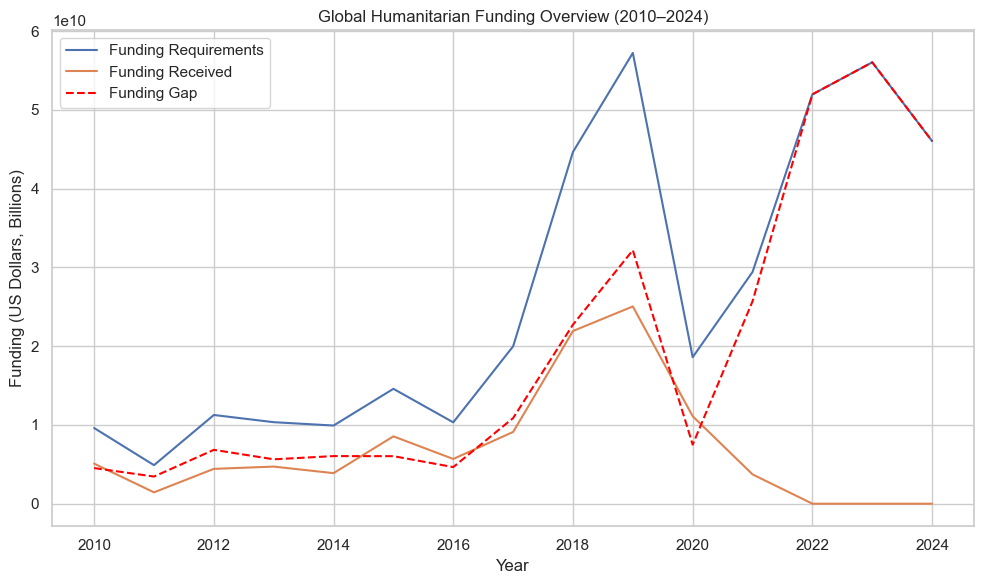

In [112]:
# Plot 1: Global Funding Evolution Over Time (in Billions)

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_summary, x='Year', y='Funding Requirements', label='Funding Requirements')
sns.lineplot(data=yearly_summary, x='Year', y='Funding Received', label='Funding Received')
sns.lineplot(data=yearly_summary, x='Year', y='Funding Gap', label='Funding Gap', linestyle='--', color='red')
plt.title('Global Humanitarian Funding Overview (2010–2024)')
plt.ylabel('Funding (US Dollars, Billions)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()


#### Reflection: Plot 1 - Global Humanitarian Funding Overview (2010–2024)

This plot shows the global trend of humanitarian funding from 2010 to 2024. While funding requirements increased significantly over the years, especially after 2016, funding received remained consistently lower. The dashed red line highlights the funding gap, which widened sharply in the later years, indicating that more was needed than what was provided. Even in years when funding received peaked, it still fell short of meeting global humanitarian needs.

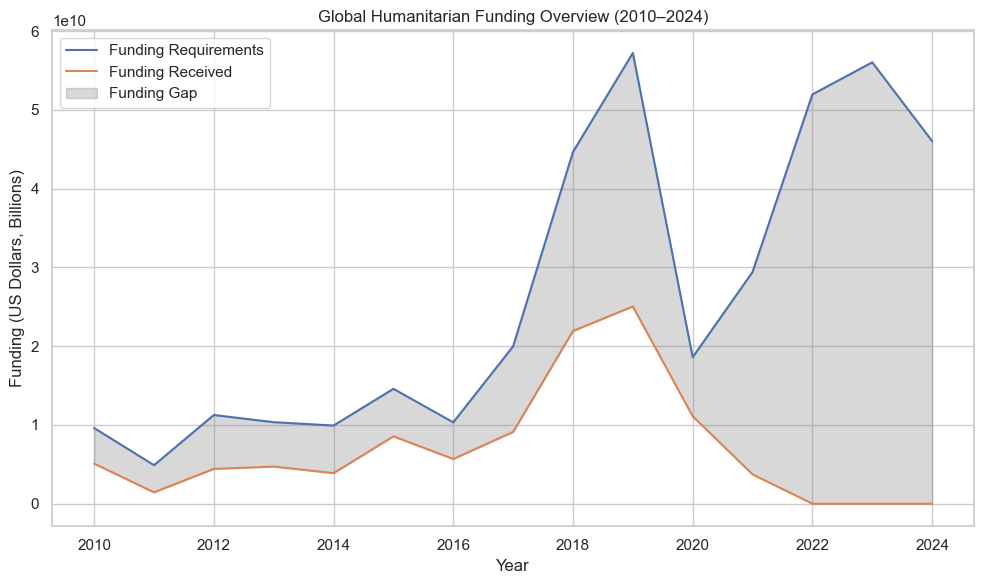

In [114]:
# Plot 2: Global Funding Gap Over Time (in Billions)
# Line Plot with Shaded Funding Gap (2010–2024)

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_summary, x='Year', y='Funding Requirements', label='Funding Requirements')
sns.lineplot(data=yearly_summary, x='Year', y='Funding Received', label='Funding Received')

# Fill the gap
plt.fill_between(
    yearly_summary['Year'],
    yearly_summary['Funding Requirements'],
    yearly_summary['Funding Received'],
    where=(yearly_summary['Funding Requirements'] > yearly_summary['Funding Received']),
    color='gray',
    alpha=0.3,
    interpolate=True,
    label='Funding Gap'
)

plt.title('Global Humanitarian Funding Overview (2010–2024)')
plt.ylabel('Funding (US Dollars, Billions)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

#### Reflection: Plot 2 - Global Funding Gap Over Time (2010–2024)

This plot visualizes the growing gap between global humanitarian funding requirements and actual funding received from 2010 to 2024. The shaded gray area represents the unmet needs, the funding gap, which expanded sharply after 2017. Although funding received increased in some years, it never fully caught up with rising requirements. The gap peaked around 2022 to 2023, highlighting the deepening shortfall in humanitarian funding.

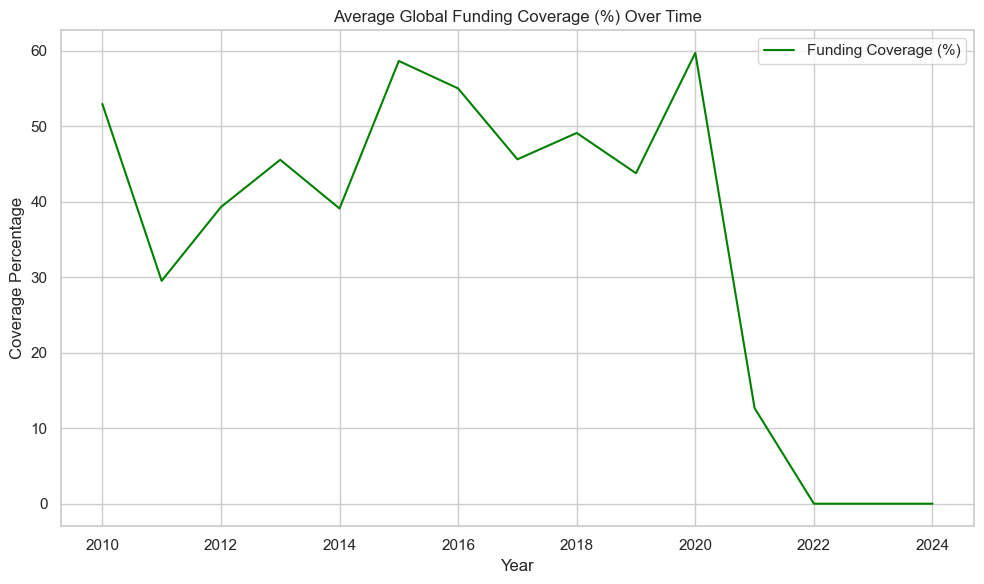

In [116]:
# Plot 3: Average Global Funding Coverage Over Time (%) 

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_summary, x='Year', y='Funding Coverage (%)', label='Funding Coverage (%)', color='green')
plt.title('Average Global Funding Coverage (%) Over Time')
plt.ylabel('Coverage Percentage')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

#### Reflection: Plot 3 - Average Global Funding Coverage (%) Over Time (2010 - 2024)

This plot shows the average global funding coverage percentage from 2010 to 2024. Between 2010 and 2020, coverage fluctuated but generally stayed between 40 and 60 percent, indicating that less than two-thirds of funding needs were typically met. However, starting in 2020, coverage declined drastically, falling to zero by 2022 and remaining there through 2024. This sharp drop signals a critical gap in humanitarian funding fulfillment in recent years.


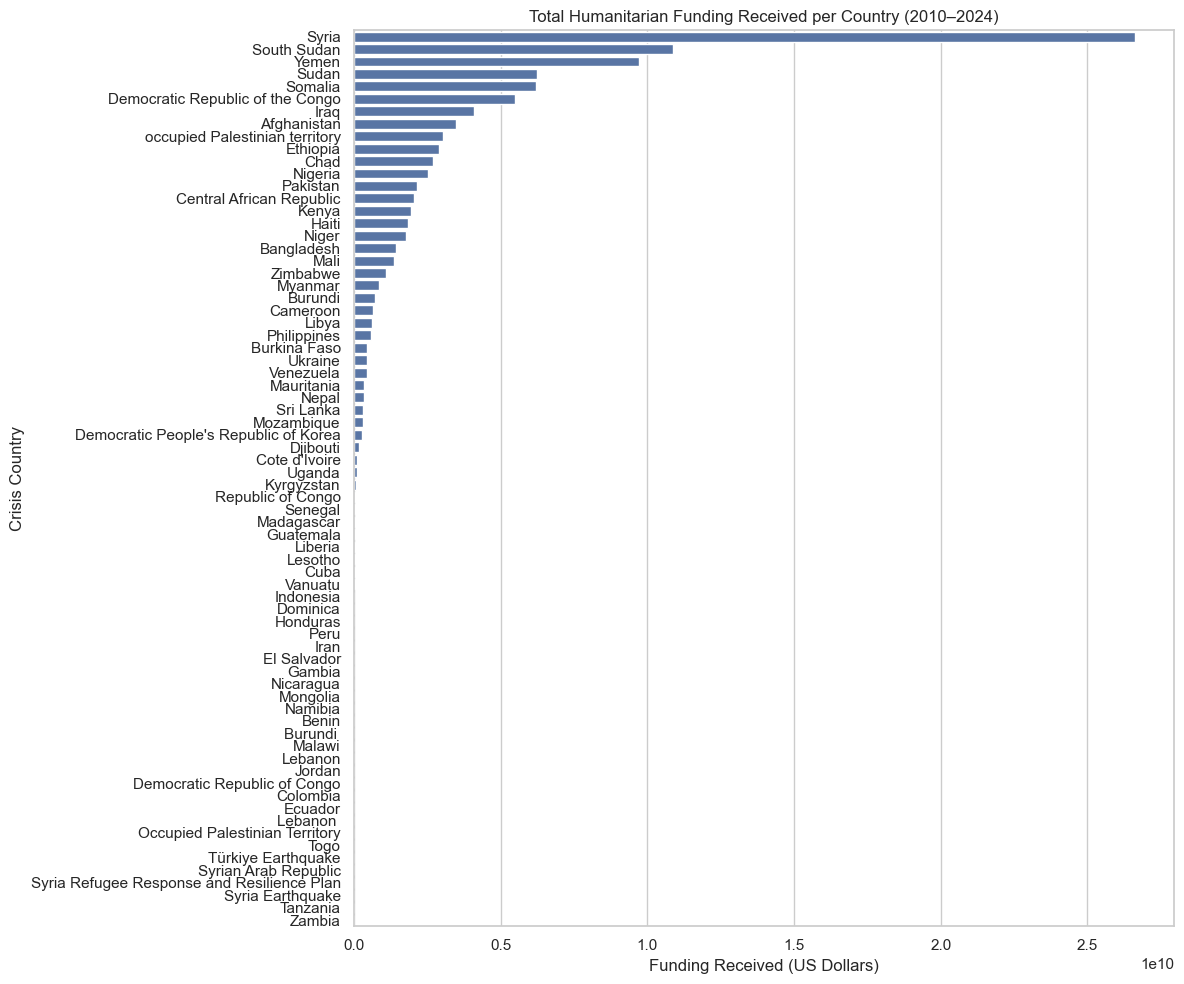

In [117]:
# Plot 4: Aggregate total funding received per country (in Billions)
total_funding_by_country = country_year_summary.groupby('Crisis Country')['Funding Received'].sum().sort_values(ascending=False)

# Create the barplot
plt.figure(figsize=(12, 10))
sns.barplot(x=total_funding_by_country.values, y=total_funding_by_country.index,)

plt.title('Total Humanitarian Funding Received per Country (2010–2024)')
plt.xlabel('Funding Received (US Dollars)')
plt.ylabel('Crisis Country')
plt.tight_layout()
plt.show()

#### Reflection: Plot 4 - The Total Humanitarian Funding Received per Country (2010 - 2024)

This horizontal bar chart presents the total humanitarian funding received by each country between 2010 and 2024. Syria stands out as the top recipient, followed by South Sudan, Yemen, and Sudan, indicating a concentration of funding in countries experiencing prolonged or intense crises. Most other countries received significantly less, highlighting the uneven distribution of humanitarian aid across regions. 

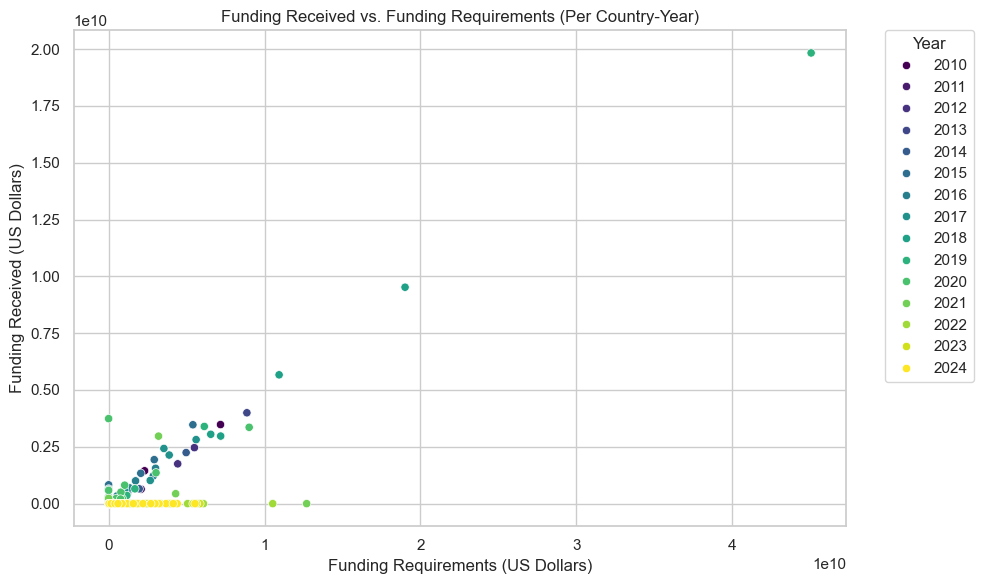

Pearson correlation between funding requirements and funding received: 0.873


In [118]:

# Plot 5: Funding Received vs Requirements (Country-Year Level) — USD 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_year_summary,
    x='Funding Requirements',
    y='Funding Received',
    hue='Year',
    palette='viridis',
    legend= 'full',
)
plt.title('Funding Received vs. Funding Requirements (Per Country-Year)')
plt.xlabel('Funding Requirements (US Dollars)')
plt.ylabel('Funding Received (US Dollars)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Pearson correlation between Funding Requirements and Funding Received
funding_corr = country_year_summary['Funding Requirements'].corr(country_year_summary['Funding Received'])
print(f"Pearson correlation between funding requirements and funding received: {funding_corr:.3f}")


#### Reflection: Plot 5 - Funding Received vs. Funding Requirements (Per Country-Year)

This scatter plot shows the relationship between humanitarian funding requirements and funding received across countries and years. Each point represents a specific country-year, with colors indicating different years from 2010 to 2024. Most points cluster toward the lower end of the funding scale, with a few high-value outliers. 

The plot reveals a strong positive relationship between the two variables, confirmed by a Pearson correlation coefficient of 0.873, suggesting that higher funding needs are generally associated with higher funding received. However, several entries show high requirements with little or no funding, particularly noticeable in 2024, as seen in the cluster of yellow dots.

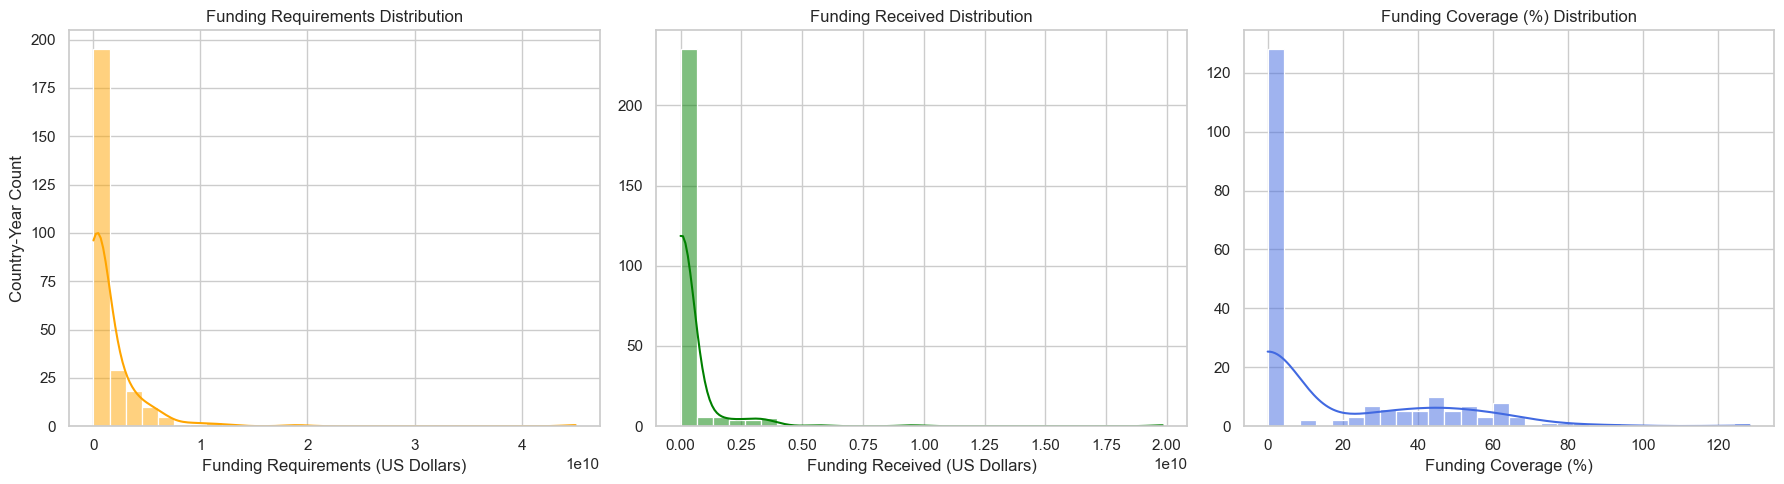

In [121]:
# View distribution curve of Funding Requirements, Funding Received and Funding Coverage %  

# Create 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Distribution of Funding Requirements
sns.histplot(
    country_year_summary['Funding Requirements'].dropna(),
    bins=30,
    kde=True,
    color='orange',
    ax=axes[0]
)
axes[0].set_title('Funding Requirements Distribution')
axes[0].set_xlabel('Funding Requirements (US Dollars)')
axes[0].set_ylabel('Country-Year Count')

# Plot 2: Distribution of Funding Received
sns.histplot(
    country_year_summary['Funding Received'].dropna(),
    bins=30,
    kde=True,
    color='green',
    ax=axes[1]
)
axes[1].set_title('Funding Received Distribution')
axes[1].set_xlabel('Funding Received (US Dollars)')
axes[1].set_ylabel('')

# Plot 3: Distribution of Funding Coverage (%)
sns.histplot(
    country_year_summary['Funding Coverage (%)'].dropna(),
    bins=30,
    kde=True,
    color='royalblue',
    ax=axes[2]
)
axes[2].set_title('Funding Coverage (%) Distribution')
axes[2].set_xlabel('Funding Coverage (%)')
axes[2].set_ylabel('')

# Layout fix
plt.tight_layout()
plt.show()


#### Reflection: Plot 6 - Distributions of Funding Requirements, Received, and Coverage

These distribution plots reflect humanitarian funding trends across all country-year entries from 2010 to 2024.  The distributions of funding received, requirements, and coverage are all heavily right-skewed. This indicates that most country-year instances have low funding, low requirements, and low coverage, while a few outliers represent very high values, highlighting significant disparities in humanitarian aid.

# Analysis Question
How has humanitarian funding evolved globally and across countries from 2010 to 2024, including funding gaps, coverage trends, and was the distribution of funding coverage across countries balanced or skewed?

Ans:

Based on the provided data and visualizations, humanitarian funding from 2010 to 2024 has evolved with distinct global and country-level trends:

**1. Global Evolution of Humanitarian Funding (2010-2024):**

- **Overall Growth with Fluctuations:** Global humanitarian funding generally increased from 2010, reaching a significant peak around 2018-2019, before experiencing a notable decline in the subsequent years. This suggests periods of increased donor response followed by contraction.

- **Widening Funding Gaps:** While both funding requirements and funding received have shown an upward trend over the period, the increase in requirements has outpaced the increase in received funding. This has resulted in a consistently widening funding gap, indicating a growing unmet need for humanitarian assistance globally.

- **Inconsistent Funding Coverage:** The average global funding coverage, which represents the percentage of requirements met, has fluctuated significantly but has consistently remained below 60%. This highlights a persistent challenge in adequately funding global humanitarian operations, meaning that, on average, a substantial portion of the required aid is not secured.

**2. Evolution Across Countries and Distribution of Funding Coverage:**

- **Skewed Funding Distribution:** The total humanitarian funding received per country is highly unevenly distributed. A small number of countries receive a disproportionately large share of the overall funding, while many other countries receive significantly less. This indicates a concentration of resources in specific crises or regions, rather than an equitable spread.

- **Strong, but Imperfect, Correlation between Requirements and Received Funding:** The Pearson correlation coefficient of 0.873 between funding requirements and funding received indicates a strong positive relationship. This means that as humanitarian needs increase in a country, the funding it receives generally also increases. However, since the correlation is not 1.0, it suggests that other factors or limitations prevent funding from perfectly matching requirements, leading to varying levels of unmet needs despite high requirements.

- **Skewed Distribution of Funding Coverage:** The distribution of funding coverage across countries is notably skewed. This implies that while a few countries or crises might achieve relatively high funding coverage, a larger number of countries experience significantly lower coverage. This imbalance means that the effectiveness of humanitarian response, in terms of meeting needs, varies drastically from one context to another. The distribution is not balanced; it is heavily weighted towards lower coverage for many, with a few exceptions.

In conclusion, humanitarian funding has grown but struggles to keep pace with escalating global needs, leading to persistent and widening funding gaps. The distribution of this funding and its coverage is highly skewed towards a few recipients, highlighting significant disparities in how effectively humanitarian needs are met across different countries.